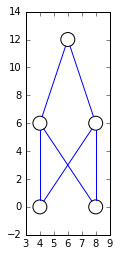

In [8]:
from matplotlib import pyplot
from math import cos, sin, atan

%matplotlib inline

class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons):
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in xrange(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return horizontal_distance_between_neurons * (number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = neuron_radius * sin(angle)
        y_adjustment = neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self):
        for neuron in self.neurons:
            neuron.draw()
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)


class NeuralNetwork():
    def __init__(self):
        self.layers = []

    def add_layer(self, number_of_neurons):
        layer = Layer(self, number_of_neurons)
        self.layers.append(layer)

    def draw(self):
        for layer in self.layers:
            layer.draw()
        pyplot.axis('scaled')
        pyplot.show()

if __name__ == "__main__":
    vertical_distance_between_layers = 6
    horizontal_distance_between_neurons = 4
    neuron_radius = 0.5
    number_of_neurons_in_widest_layer = 4
    network = NeuralNetwork()
    network.add_layer(2)
    network.add_layer(2)
    network.add_layer(1)
    network.draw()

Multilayer Perceptron

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#XOR input and output, constants
bias = -1
x = np.array([[0.0,0.0,bias],[0.0,1.0,bias],[1.0,0.0,bias],[1.0,1.0,bias]])
y = np.array([0.0,1.0,1.0,0.0])
eta1 = 0.1
eta2 = 0.3
eta3 = 0.5
eta4 = 0.9
alpha = 0.05

number_of_steps = 10000

In [398]:
#sigmoid function
def f(x):
    return 1/(1 + np.exp(-x))

In [440]:
def perceptron(w1, w2, u, eta):
    dw1 = np.array([0,0,0])
    dw2 = np.array([0,0,0])
    du = np.array([0,0,0])
    err = 111
    iter = 0

    while(abs(err)>0.02):
        out = [] 
        iter += 1
        for i in range(len(y)):
            o_in1 = f(np.dot(x[i], w1))
            o_in2 = f(np.dot(x[i], w2))
            intermediate_out = np.array([o_in1, o_in2, bias])
            o_out = f(np.dot(intermediate_out, u))
  
            delta_out = o_out * (y[i] - o_out) *  (1 -o_out)
            err = y[i] - o_out
            delta_h1 = o_in1 * (1 - o_in1) * u[0] * delta_out
            delta_h2 = o_in2 * (1 - o_in2) * u[1] * delta_out
            for j in range(3):
                u[j] = alpha*du[j] + u[j] + (1 - alpha)*eta * delta_out * intermediate_out[j]
                w1[j] = alpha*dw1[j] + w1[j] + (1 - alpha)*eta * delta_h1 * x[i][j]
                w2[j] = alpha*dw2[j] + w2[j] + (1 - alpha)*eta * delta_h2 * x[i][j] 
                du[j] = alpha*du[j] + (1 - alpha)*eta * delta_out * intermediate_out[j]
                dw1[j] = alpha*dw1[j] + (1 - alpha)*eta * delta_h1 * x[i][j] 
                dw2[j] = alpha*dw2[j] + (1 - alpha)*eta * delta_h2 * x[i][j] 
            out.append(o_out) 
    output = ["%.3f" % element for element in out]
    weights = np.array([w1, w2, u])
    print "iterations"
    print iter
    return output, weights

In [471]:
def classify(x,w1,w2,u):
    x = np.append(x,-1)
    o_in1 = f(np.dot(x, w1))
    o_in2 = f(np.dot(x, w2))
    intermediate_out = np.array([o_in1, o_in2, -1])
    o_out = f(np.dot(intermediate_out, u))
    return o_out

In [ ]:
from matplotlib import pyplot
from math import cos, sin, atan

%matplotlib inline

points_to_classify = np.zeros([10,10,2])

for i in range(10):
    for j in range(10):
        points_to_classify[i][j][0] = i / 10.0
        points_to_classify[i][j][1] = j / 10.0

points_to_draw = np.zeros([10,10])


# random initial weights, 3 - because of the bias

w1_rnd = np.array([np.random.random() for i in range(3)])
w2_rnd = np.array([np.random.random() for i in range(3)])
u_rnd = np.array([np.random.random() for i in range(3)])

#print "eta1"
#print perceptron(w1_rnd, w2_rnd, u_rnd, eta1)[0]
#weights = perceptron(w1_rnd, w2_rnd, u_rnd, eta1)[1]
#for i in range(10):
#    for j in range(10):
#        if classify(points_to_classify[i][j],weights[0],weights[1],weights[2]) > 0.5:
#            points_to_draw[i][j] = 1
#        else:
#            points_to_draw[i][j] = 0
#print points_to_draw

print "eta2"
print perceptron(w1_rnd, w2_rnd, u_rnd, eta2)[0]
for i in range(10):
    for j in range(10):
        if classify(points_to_classify[i][j],weights[0],weights[1],weights[2]) > 0.5:
            points_to_draw[i][j] = 0
        else:
            points_to_draw[i][j] = 1
print points_to_draw
print "eta3"
print perceptron(w1_rnd, w2_rnd, u_rnd, eta3)[0]
for i in range(10):
    for j in range(10):
        if classify(points_to_classify[i][j],weights[0],weights[1],weights[2]) > 0.5:
            points_to_draw[i][j] = 1
        else:
            points_to_draw[i][j] = 0
print points_to_draw
#print "eta4"
#print perceptron(w1_rnd, w2_rnd, u_rnd, eta4)[0]
#for i in range(10):
#    for j in range(10):
#        if classify(points_to_classify[i][j],weights[0],weights[1],weights[2]) > 0.5:
#            points_to_draw[i][j] = 1
#        else:
#            points_to_draw[i][j] = 0
print points_to_draw


In [427]:
# zero initial weights
w1_zero = np.array([0,0,0])
w2_zero = np.array([0,0,0])
u_zero = np.array([0,0,0])

print "eta1"
print perceptron(w1_zero, w2_zero, u_zero, eta1)
print "eta2"
print perceptron(w1_zero, w2_zero, u_zero, eta2)
print "eta3"
print perceptron(w1_zero, w2_zero, u_zero, eta3)
print "eta4"
print perceptron(w1_zero, w2_zero, u_zero, eta4)

eta1


KeyboardInterrupt: 